# 유클리디안(Euclidean) 거리
Matrix 행렬

# 코사인 유사도 (Cosine Similarity)
거리가 중요하지않고 각도가 중요할때 사용
-1~1 / 0~1(90deg~0deg)

동일한 크기와 방향 = 같은 벡터
벡터의 길이(크기) = 스칼라
||a||= a벡터의 길이

dot product (벡터의 내적) = 두 벡터 사이의 각
cos(d1,d2)=(d1*d2)/||d1||||d2||

# K-NN 알고리즘 (K-Nearest Neighbor)
* 가장 가까운 데이터를 기준으로 새로운 데이터의 클래스를 분류
* 새로운 입력 데이터와 가장 가까운 k개의 이웃 데이터 선택
* 다수결로 데이터의 클래스 결정
* 지도학습 (Supervised Learning)
* K값(Optinal Hyper Parameter) 에 따라 선택이 달라짐 

데이터의 특징과 상황에 따라 가장 적합한 알고리즘을 선택
최고의 알고리즘은 존재하지 않음

"Grid Search"
Optinal Hyper Parameter을 설정해주는 것
최적의 표본을 설정

# Standardization vs Normalizastion

* Standardization(표준화) : 표준 정규분포의 속성을 갖도록 데이터 값을 재조정
* (요소값 - 평균)/표준편차
* 편차/표준편차
* 경사하강법이 빨라진다
* 범위 제한 없음
* 거리 기반

* Normalization(정규화) : (요소값 - 최소값) / (최대값- 최소값)  # minmax
* 범위 : 0~1사이
* 이미지 전처리

표준화 -> outluers(이상치 제거) -> 정규화 -> 데이터출력

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
train = pd.read_csv("C:/Users/user/Documents/visual/Vis_Day1/titanic/train.csv")
test = pd.read_csv("C:/Users/user/Documents/visual/Vis_Day1/titanic/test.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
trainLen = len(train)
testCopy = test.copy()

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
import warnings
warnings.filterwarnings("ignore")
total = train.append(test)
total

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
total.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [8]:
total[total.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [9]:
total[(total.Pclass==3)&(total.Embarked=="S")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,NaN,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
412,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [10]:
total[(total.Pclass==3)&(total.Embarked=="S")]["Fare"].median() #8.05
total["Fare"].fillna(total[(total.Pclass==3)&(total.Embarked=="S")]["Fare"].median(),inplace=True)
total[total.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [11]:
total["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [12]:
total["Name"].str.extract("([A-Za-z]+)\.",expand = False)

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Name, Length: 1309, dtype: object

In [13]:
total["Title"]=total["Name"].str.extract("([A-Za-z]+)\.",expand = True)
total

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


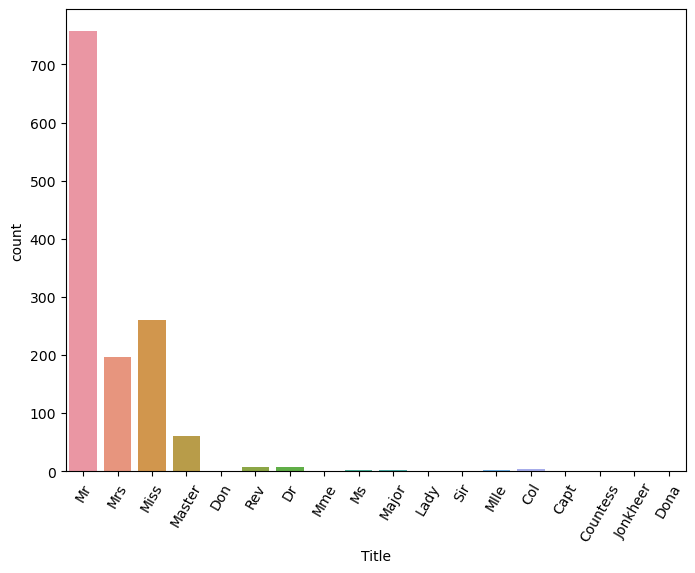

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(x="Title",data=total)
plt.xticks(rotation=60)
plt.show()

In [15]:
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}

In [16]:
total.replace({"Title":mapping},inplace=True)
total

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Mrs
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [17]:
total["Title"].value_counts()

Mr        767
Miss      265
Mrs       200
Master     61
Rev         8
Dr          8
Name: Title, dtype: int64

In [18]:
total["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Dr'], dtype=object)

In [19]:
total["Title"].nunique()

6

In [24]:
for title in total["Title"].unique():
    print(title)
for title in list(total["Title"].unique()):
    print(title)

Mr
Mrs
Miss
Master
Rev
Dr
Mr
Mrs
Miss
Master
Rev
Dr


In [23]:
total["Age"].isnull().sum()

263

In [25]:
total.groupby(["Title"])["Age"].median()

Title
Dr        49.0
Master     4.0
Miss      22.0
Mr        30.0
Mrs       36.0
Rev       41.5
Name: Age, dtype: float64

In [30]:
total.groupby("Title").groups

{'Dr': [245, 317, 398, 632, 660, 766, 796, 293], 'Master': [7, 16, 50, 59, 63, 65, 78, 125, 159, 164, 165, 171, 176, 182, 183, 193, 261, 278, 305, 340, 348, 386, 407, 445, 480, 489, 549, 709, 751, 755, 787, 788, 802, 803, 819, 824, 827, 831, 850, 869, 21, 55, 64, 80, 89, 154, 161, 192, 194, 196, 201, 244, 281, 307, 339, 344, 360, 379, 389, 392, 417], 'Miss': [2, 10, 11, 14, 22, 24, 28, 32, 38, 39, 43, 44, 47, 56, 58, 61, 68, 71, 79, 82, 84, 88, 100, 106, 109, 111, 113, 114, 119, 123, 128, 136, 141, 147, 156, 172, 177, 180, 184, 192, 195, 198, 199, 205, 208, 211, 215, 216, 218, 229, 233, 235, 237, 240, 241, 246, 257, 258, 264, 269, 274, 275, 276, 289, 290, 293, 297, 300, 303, 306, 309, 310, 311, 315, 318, 322, 325, 329, 330, 337, 341, 345, 346, 356, 357, 358, 359, 368, 369, 374, 376, 380, 381, 387, 389, 393, 396, 402, 404, 409, ...], 'Mr': [0, 4, 5, 6, 12, 13, 17, 20, 21, 23, 26, 27, 29, 30, 33, 34, 35, 36, 37, 42, 45, 46, 48, 51, 54, 55, 57, 60, 62, 64, 67, 69, 70, 72, 73, 74, 75, 76, 

In [31]:
total.groupby("Title")["Age"].median()

Title
Dr        49.0
Master     4.0
Miss      22.0
Mr        30.0
Mrs       36.0
Rev       41.5
Name: Age, dtype: float64

In [33]:
titles=list(total.Title.unique())
titles

['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Dr']

In [36]:
for title in titles:
    age = total.groupby("Title")["Age"].median().loc[title] # 각 호칭별 나이의 중위수
    #각 호칭별 나이의 중위수로 각 호칭별 나이의 결측값을 대체
    total.loc[(total.Age.isnull()) & (total.Title ==title),"Age"]=age

In [37]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Title        1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [39]:
total["Family_Size"]=total["Parch"]+total["SibSp"]
total["Family_Size"].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: Family_Size, dtype: int64

In [40]:
total.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


In [41]:
total.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size
413,1305,NaN,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,NaN,S,Mr,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Mrs,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,NaN,S,Mr,0
417,1309,NaN,3,"Peter, Master. Michael J",male,4.0,1,1,2668,22.3583,NaN,C,Master,2


In [43]:
total["Last_Name"]=total["Name"].apply(lambda x: str.split(x,",")[0])
total

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Last_Name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,NaN,S,Mr,0,Spector
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Mrs,0,Oliva y Ocana
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,0,Saether
416,1308,NaN,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,NaN,S,Mr,0,Ware


In [45]:
total["Last_Name"].value_counts()

Andersson    11
Sage         11
Goodwin       8
Asplund       8
Davies        7
             ..
Milling       1
Maisner       1
Goncalves     1
Campbell      1
Saether       1
Name: Last_Name, Length: 875, dtype: int64

In [46]:
dsr = 0.5  # 기본 생존율 default survived

In [47]:
total["Family_Survival"]=dsr

In [48]:
total.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Last_Name,Family_Survival
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,Braund,0.5
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,Cumings,0.5
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,Heikkinen,0.5
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,Futrelle,0.5
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,Allen,0.5


In [52]:
len(total.groupby("Last_Name").groups) # 875개
len(total.groupby(["Last_Name","Fare"]).groups) # 982개
total.groupby(["Last_Name","Fare"]).groups # 성이 같으면서 운임이 동일한 그룹 => 가족으로 간주해보자

{('Abbing', 7.55): [845], ('Abbott', 20.25): [279, 746, 392], ('Abelseth', 7.65): [57, 345], ('Abelson', 24.0): [308, 874], ('Abrahamsson', 7.925): [251], ('Abrahim', 7.2292): [8], ('Adahl', 7.25): [365], ('Adams', 8.05): [401], ('Ahlin', 9.475): [40], ('Aks', 9.35): [855, 307], ('Albimona', 18.7875): [207], ('Aldworth', 13.0): [78], ('Alexander', 7.8875): [810], ('Alhomaki', 7.925): [840], ('Ali', 7.05): [210, 784], ('Allen', 8.05): [4], ('Allen', 211.3375): [730], ('Allison', 151.55): [297, 305, 498, 306], ('Allum', 8.3): [834], ('Andersen', 22.525): [210], ('Andersen-Jensen', 7.8542): [192], ('Anderson', 26.55): [460], ('Andersson', 7.775): [214, 320], ('Andersson', 7.7958): [146], ('Andersson', 7.925): [68], ('Andersson', 31.275): [13, 119, 541, 542, 610, 813, 850], ('Andreasson', 7.8542): [91], ('Andrew', 10.5): [204], ('Andrew', 11.5): [144], ('Andrews', 0.0): [806], ('Andrews', 77.9583): [275], ('Angheloff', 7.8958): [295], ('Angle', 26.0): [518, 190], ('Appleton', 51.4792): [57

In [53]:
total.groupby(["Last_Name","Fare"])

In [58]:
for grp,grpdf in total.groupby(["Last_Name","Fare"]):
    print(grp)
    print(grpdf)
    print("="*50)

('Abbing', 7.55)
     PassengerId  Survived  Pclass                 Name   Sex   Age  SibSp  \
845          846       0.0       3  Abbing, Mr. Anthony  male  42.0      0   

     Parch     Ticket  Fare Cabin Embarked Title  Family_Size Last_Name  \
845      0  C.A. 5547  7.55   NaN        S    Mr            0    Abbing   

     Family_Survival  
845              0.5  
('Abbott', 20.25)
     PassengerId  Survived  Pclass                              Name     Sex  \
279          280       1.0       3  Abbott, Mrs. Stanton (Rosa Hunt)  female   
746          747       0.0       3       Abbott, Mr. Rossmore Edward    male   
392         1284       NaN       3     Abbott, Master. Eugene Joseph    male   

      Age  SibSp  Parch     Ticket   Fare Cabin Embarked   Title  Family_Size  \
279  35.0      1      1  C.A. 2673  20.25   NaN        S     Mrs            2   
746  16.0      1      1  C.A. 2673  20.25   NaN        S      Mr            2   
392  13.0      0      2  C.A. 2673  20.25   NaN

In [68]:
for grp, grp_df in total[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId', 'SibSp', 'Parch', 'Age','Cabin']].groupby(['Last_Name', 'Fare']):
    if(len(grp_df)!=1): # 함께 탑승한 가족이 있을때
        for ind, row in grp_df.iterrows():
            smax = grp_df.drop(ind)["Survived"].max()
            smin = grp_df.drop(ind)["Survived"].min()
            passID = row["PassengerId"]
            if(smax==1.0): # 본인을 제외한 나머지 가족 구성원 중에 생존자가 있다면 "Family_Survival"을 1로 설정
                total.loc[total["PassengerId"]==passID,"Family_Survival"]=1
            elif(smin==0.0):
                total.loc[total["PassengerId"]==passID,"Family_Survival"]=0

In [69]:
total.loc[total["Family_Survival"]!=0.5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Last_Name,Family_Survival
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,Futrelle,0.0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,4,Palsson,0.0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,2,Johnson,1.0
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,1,Nasser,0.0
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Miss,2,Sandstrom,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,1293,NaN,2,"Gale, Mr. Harry",male,38.0,1,0,28664,21.0000,NaN,S,Mr,1,Gale,0.0
403,1295,NaN,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S,Mr,0,Carrau,0.0
407,1299,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,Mr,2,Widener,0.0
411,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,Mrs,1,Minahan,1.0


In [71]:
total.loc[total["Family_Survival"]!=0.5].shape # 420건, 가족의 생사여부가 확인된 승객의 수 420명

(420, 16)

In [72]:
total.groupby(["Ticket"]).groups # 티켓 번호가 같을때 가족이라 간주

{'110152': [257, 504, 759], '110413': [262, 558, 585], '110465': [110, 475], '110469': [335], '110489': [158], '110564': [430], '110813': [366, 236], '111163': [191], '111240': [170], '111320': [462], '111361': [329, 523], '111369': [889], '111426': [604], '111427': [507], '111428': [187], '112050': [806], '112051': [266], '112052': [633], '112053': [887], '112058': [815, 372], '112059': [263], '112277': [209], '112377': [240], '112378': [368, 402], '112379': [766], '112901': [305], '113028': [711], '113038': [215], '113043': [331], '113044': [355], '113050': [536], '113051': [452], '113054': [28], '113055': [857], '113056': [284], '113059': [83, 403], '113501': [782], '113503': [377, 74, 75, 218, 407], '113505': [166, 356], '113509': [54, 26], '113510': [351], '113514': [252], '113572': [61, 829], '113760': [390, 435, 763, 802], '113767': [185], '113773': [748, 182], '113776': [151, 336], '113778': [41], '113780': [131], '113781': [297, 305, 498, 708, 141, 306], '113783': [11], '11378

In [73]:
for grp,grp_df in total.groupby(["Ticket"]):
    print(grp)
    print(grp_df)
    print("="*50)

110152
     PassengerId  Survived  Pclass  \
257          258       1.0       1   
504          505       1.0       1   
759          760       1.0       1   

                                                  Name     Sex   Age  SibSp  \
257                               Cherry, Miss. Gladys  female  30.0      0   
504                              Maioni, Miss. Roberta  female  16.0      0   
759  Rothes, the Countess. of (Lucy Noel Martha Dye...  female  33.0      0   

     Parch  Ticket  Fare Cabin Embarked Title  Family_Size Last_Name  \
257      0  110152  86.5   B77        S  Miss            0    Cherry   
504      0  110152  86.5   B79        S  Miss            0    Maioni   
759      0  110152  86.5   B77        S   Mrs            0    Rothes   

     Family_Survival  
257              0.5  
504              0.5  
759              0.5  
110413
     PassengerId  Survived  Pclass                                    Name  \
262          263       0.0       1                       

In [74]:
for grp, grp_df in total.groupby(["Ticket"]):  
    if(len(grp_df)!=1):  # 티켓 번호가 동일한 사람이 있다면
        for ind, row in grp_df.iterrows():
            smax = grp_df.drop(ind)["Survived"].max()
            smin = grp_df.drop(ind)["Survived"].min()
            passID = row["PassengerId"]
            if(smax==1.0): # 본인을 제외한 나머지 가족 구성원 중에 생존자가 있다면 "Family_Survival"을 1로 설정
                total.loc[total["PassengerId"]==passID,"Family_Survival"]=1
            elif(smin==0.0):
                total.loc[total["PassengerId"]==passID,"Family_Survival"]=0

In [75]:
total.loc[total["Family_Survival"]!=0.5].shape

(546, 16)

In [79]:
total["Fare_Bin"] = pd.qcut(total["Fare"],5,labels=False)
pd.qcut(total["Fare"],5).value_counts()

(-0.001, 7.854]      275
(21.558, 41.579]     265
(41.579, 512.329]    259
(7.854, 10.5]        255
(10.5, 21.558]       255
Name: Fare, dtype: int64

In [80]:
total

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Last_Name,Family_Survival,Fare_Bin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,Braund,0.5,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,Cumings,0.5,4
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,Heikkinen,0.5,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,Futrelle,0.0,4
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,Allen,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,NaN,S,Mr,0,Spector,0.5,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Mrs,0,Oliva y Ocana,1.0,4
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,0,Saether,0.5,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,NaN,S,Mr,0,Ware,0.5,1


In [82]:
total["Fare_Bin"] = pd.qcut(total["Fare"],5,labels=False)
total["Age_Bin"]= pd.qcut(total["Age"],4,labels=False)
total

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Last_Name,Family_Survival,Fare_Bin,Age_Bin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,Braund,0.5,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,Cumings,0.5,4,3
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,Heikkinen,0.5,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,Futrelle,0.0,4,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,Allen,0.5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,NaN,S,Mr,0,Spector,0.5,1,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Mrs,0,Oliva y Ocana,1.0,4,3
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,0,Saether,0.5,0,3
416,1308,NaN,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,NaN,S,Mr,0,Ware,0.5,1,1


In [83]:
total.Sex.replace({"male":0,"female":1},inplace=True) # k-nn사용을 위해 성별을 숫자로 표현

In [84]:
total.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Last_Name,Family_Survival,Fare_Bin,Age_Bin
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,Braund,0.5,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,Cumings,0.5,4,3
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,Heikkinen,0.5,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs,1,Futrelle,0.0,4,2
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr,0,Allen,0.5,1,2


In [85]:
total.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Family_Size',
       'Last_Name', 'Family_Survival', 'Fare_Bin', 'Age_Bin'],
      dtype='object')

In [87]:
total = total[["Survived","Pclass","Sex","Age_Bin","Family_Size","Family_Survival","Fare_Bin"]]
# 생존에 연관있는 것들만 걸러내기
total

,Survived,Pclass,Sex,Age_Bin,Family_Size,Family_Survival,Fare_Bin
0,0.0,3,0,0,1,0.5,0
1,1.0,1,1,3,1,0.5,4
2,1.0,3,1,1,0,0.5,1
3,1.0,1,1,2,1,0.0,4
4,0.0,3,0,2,0,0.5,1
...,...,...,...,...,...,...,...
413,NaN,3,0,1,0,0.5,1
414,NaN,1,1,3,0,1.0,4
415,NaN,3,0,3,0,0.5,0
416,NaN,3,0,1,0,0.5,1


In [90]:
trainLen
train = total[:trainLen]
train

,Survived,Pclass,Sex,Age_Bin,Family_Size,Family_Survival,Fare_Bin
0,0.0,3,0,0,1,0.5,0
1,1.0,1,1,3,1,0.5,4
2,1.0,3,1,1,0,0.5,1
3,1.0,1,1,2,1,0.0,4
4,0.0,3,0,2,0,0.5,1
...,...,...,...,...,...,...,...
886,0.0,2,0,1,0,0.5,2
887,1.0,1,1,0,0,0.5,3
888,0.0,3,1,0,3,0.0,3
889,1.0,1,0,1,0,0.5,3


In [93]:
xtrain=train.drop(columns=["Survived"])
xtrain

,Pclass,Sex,Age_Bin,Family_Size,Family_Survival,Fare_Bin
0,3,0,0,1,0.5,0
1,1,1,3,1,0.5,4
2,3,1,1,0,0.5,1
3,1,1,2,1,0.0,4
4,3,0,2,0,0.5,1
...,...,...,...,...,...,...
886,2,0,1,0,0.5,2
887,1,1,0,0,0.5,3
888,3,1,0,3,0.0,3
889,1,0,1,0,0.5,3


In [96]:
ytrain = train["Survived"].astype(int)
ytrain

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int32

In [98]:
total[trainLen:]

,Survived,Pclass,Sex,Age_Bin,Family_Size,Family_Survival,Fare_Bin
0,NaN,3,0,2,0,0.5,0
1,NaN,3,1,3,1,0.5,0
2,NaN,2,0,3,0,0.5,1
3,NaN,3,0,1,0,0.5,1
4,NaN,3,1,0,2,1.0,2
...,...,...,...,...,...,...,...
413,NaN,3,0,1,0,0.5,1
414,NaN,1,1,3,0,1.0,4
415,NaN,3,0,3,0,0.5,0
416,NaN,3,0,1,0,0.5,1


1) xtrain,ytrain을 이용하여 K-NN 알고리즘으로 모델링
2) xtest데이터를 K-NN 모델에 집어넣어 분류 결과를 출력

In [99]:
xtest = total[trainLen:].drop(columns=["Survived"])

In [100]:
xtrain

,Pclass,Sex,Age_Bin,Family_Size,Family_Survival,Fare_Bin
0,3,0,0,1,0.5,0
1,1,1,3,1,0.5,4
2,3,1,1,0,0.5,1
3,1,1,2,1,0.0,4
4,3,0,2,0,0.5,1
...,...,...,...,...,...,...
886,2,0,1,0,0.5,2
887,1,1,0,0,0.5,3
888,3,1,0,3,0.0,3
889,1,0,1,0,0.5,3


In [101]:
xtest

,Pclass,Sex,Age_Bin,Family_Size,Family_Survival,Fare_Bin
0,3,0,2,0,0.5,0
1,3,1,3,1,0.5,0
2,2,0,3,0,0.5,1
3,3,0,1,0,0.5,1
4,3,1,0,2,1.0,2
...,...,...,...,...,...,...
413,3,0,1,0,0.5,1
414,1,1,3,0,1.0,4
415,3,0,3,0,0.5,0
416,3,0,1,0,0.5,1


In [114]:
scaler= StandardScaler()
scaler.fit(xtrain)

StandardScaler()

In [115]:
xtrain = scaler.transform(xtrain)
xtrain

array([[ 0.82737724, -0.73769513, -1.1437807 ,  0.05915988, -0.06066122,
        -1.4075306 ],
       [-1.56610693,  1.35557354,  1.54043863,  0.05915988, -0.06066122,
         1.42821788],
       [ 0.82737724,  1.35557354, -0.24904093, -0.56097483, -0.06066122,
        -0.69859348],
       ...,
       [ 0.82737724,  1.35557354, -1.1437807 ,  1.29942929, -1.60492259,
         0.71928076],
       [-1.56610693, -0.73769513, -0.24904093, -0.56097483, -0.06066122,
         0.71928076],
       [ 0.82737724, -0.73769513,  0.64569885, -0.56097483, -0.06066122,
        -1.4075306 ]])

In [1]:
xtest = scaler.transform(xtest)
xtest

NameError: name 'scaler' is not defined

In [117]:
clf=KNeighborsClassifier()

In [118]:
params={"n_neighbors":[3,5,7,9,11,13,15,17,19]}

In [119]:
gs=GridSearchCV(clf,param_grid=params,cv=5,scoring="roc_auc")

In [120]:
gs.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19]},
             scoring='roc_auc')

In [124]:
print(gs.best_score_)
print(gs.best_estimator_)
print(gs.best_index_)
print(gs.best_params_)

0.8785169333353242
KNeighborsClassifier(n_neighbors=17)
7
{'n_neighbors': 17}


In [125]:
pred = gs.predict(xtest)
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [127]:
pd.DataFrame({"PassengerId":testCopy["PassengerId"],"Survived":pred}).to_csv("knn_submission.csv",index=False)

# iterrows

In [62]:
dict_1 = {
    'col1': [4, 1, 5, 3, 2],
    'col2': [6, 7, 8, 9, 10],
    'col3': [11, 12, 13, 14, 15],
    'col4': [16, 17, 18, 19, 20]
}

df_1 = pd.DataFrame(dict_1)
df_1
print(df_1.iterrows()) # 행에 대한 데이터 저장됨

<generator object DataFrame.iterrows at 0x000001E508830480>


In [66]:
for i,r in df_1.iterrows():
    print(i)
    print(r)
    print("-"*50)

0
col1     4
col2     6
col3    11
col4    16
Name: 0, dtype: int64
--------------------------------------------------
1
col1     1
col2     7
col3    12
col4    17
Name: 1, dtype: int64
--------------------------------------------------
2
col1     5
col2     8
col3    13
col4    18
Name: 2, dtype: int64
--------------------------------------------------
3
col1     3
col2     9
col3    14
col4    19
Name: 3, dtype: int64
--------------------------------------------------
4
col1     2
col2    10
col3    15
col4    20
Name: 4, dtype: int64
--------------------------------------------------


In [ ]:
df_filled = df.replace(0, df.median().to_dict())